# Variants

## Imports

In [1]:
import subprocess
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11.0, 7.0)

In [2]:
DATA = Path("../data")
RESULTS = Path("../results")

## Read and filter data

In [3]:
gt_filename = RESULTS / "glycosyltransferases.txt"
gt = pd.read_table(gt_filename)

In [4]:
variants = pd.read_table(DATA / "gt_variants.txt") #, compression="gzip")

## Analysis

In [5]:
print(f"There are {len(variants):,} variants.")

There are 550,275 variants.


### Variants per glycosyltransferase

In [6]:
def variant_count(row):
    return (variants["transcriptId"] == row["transcriptId"]).sum()
gt["variantCount"] = gt.apply(variant_count, axis=1)

In [7]:
fig, ax = plt.subplots()
ax.boxplot(gt["variantCount"])
ax.set(ylabel="Number of variants")

In [8]:
fig.savefig(str(RESULTS / "gt_variant_count.png"))

Genes with the highest number of variants.

In [9]:
cols = ["ensemblId", "geneSymbol", "uniprotId", "variantCount"]
gt.nlargest(10, "variantCount")[cols]

ensemblId  geneSymbol uniprotId  variantCount
116  ENSG00000174473     GALNTL6    Q49A17         35673
132  ENSG00000184005  ST6GALNAC3    Q8NDV1         15707
59   ENSG00000147408  CSGALNACT1    Q8TDX6         14658
158  ENSG00000133424      LARGE1    O95461         14626
241  ENSG00000103489       XYLT1    Q86Y38         12181
109  ENSG00000110328     GALNT18    Q6P9A2         12156
114  ENSG00000144278     GALNT13    Q8IUC8         12104
146  ENSG00000111728     ST8SIA1    Q92185         10101
120  ENSG00000121964       GTDC1    Q4AE62         10019
166  ENSG00000152127       MGAT5    Q09328          9720

Genes with lowest number of variants.

In [10]:
gt.nsmallest(10, "variantCount")[cols]

ensemblId geneSymbol uniprotId  variantCount
26   ENSG00000162885   B3GALNT2    Q8NCR0            38
52   ENSG00000171155  C1GALT1C1    Q96EU7            43
25   ENSG00000174684     B4GAT1    O43505            45
23   ENSG00000237172     B3GNT9    Q6UX72            80
168  ENSG00000168282      MGAT2    Q10469            84
50   ENSG00000176022    B3GALT6    Q96L58            99
197  ENSG00000143315       PIGM    Q9H3S5           101
76   ENSG00000180549       FUT7    Q11130           119
32   ENSG00000177191     B3GNT8    Q7Z7M8           121
18   ENSG00000198931       APRT    P07741           132

In [11]:
gt["variantCount"].describe()

count      244.000000
mean      2255.225410
std       3491.681247
min         38.000000
25%        436.000000
50%       1106.500000
75%       2667.750000
max      35673.000000
Name: variantCount, dtype: float64

#### Normalize to variants per kb

In [12]:
gt["variantsPerKbGene"] = gt["variantCount"] / gt["geneLength"] * 1000

Show the GTs with the highest number of variants per kb gene.

In [13]:
cols = ["ensemblId", "geneSymbol", "uniprotId", "variantsPerKbGene"]
gt.nlargest(10, "variantsPerKbGene")[cols]

ensemblId geneSymbol uniprotId  variantsPerKbGene
4    ENSG00000189366      ALG1L    Q6GMV1          50.869285
18   ENSG00000198931       APRT    P07741          50.652341
211  ENSG00000169733       RFNG    Q9Y644          49.618321
5    ENSG00000251287     ALG1L2    C9J202          46.564958
171  ENSG00000129744       ART1    P52961          46.192130
173  ENSG00000167311       ART5    Q96L15          45.621395
233  ENSG00000213759    UGT2B11    O75310          44.651918
106  ENSG00000140297      GCNT3    O95395          44.417502
237  ENSG00000109181    UGT2B10    P36537          43.541173
7    ENSG00000033011       ALG1    Q9BT22          42.025459

Show the GTs with the lowest number of variants per kb.

In [14]:
gt.sort_values("variantsPerKbGene", ascending=True).iloc[:10][cols]
gt.nsmallest(10, "variantsPerKbGene")[cols]

ensemblId geneSymbol uniprotId  variantsPerKbGene
163  ENSG00000182050     MGAT4C    Q9UBM8           0.614783
26   ENSG00000162885   B3GALNT2    Q8NCR0           0.696494
148  ENSG00000073849    ST6GAL1    P15907           2.444806
176  ENSG00000147162        OGT    O15294           6.306201
12   ENSG00000101901      ALG13    Q9NP73           7.359841
31   ENSG00000175164        ABO    P16442           8.100266
155  ENSG00000165704      HPRT1    P00492           8.647968
195  ENSG00000165195       PIGA    P37287           9.175449
52   ENSG00000171155  C1GALT1C1    Q96EU7           9.866911
81   ENSG00000182870     GALNT9    Q9HCQ5          10.520537

In [15]:
gt["variantsPerKbGene"].describe()

count    244.000000
mean      29.576041
std        7.480043
min        0.614783
25%       26.868699
50%       29.450946
75%       33.650257
max       50.869285
Name: variantsPerKbGene, dtype: float64

#### Protein sequence-altering variants

Count the number of AA-altering variants per GT.

In [16]:
def get_aa_altering_variant_count(row):
    tid = row['transcriptId']
    return len(variants.query("isAminoAcidAltering == True and transcriptId == @tid"))

gt["aaAlteringVariantCount"] = gt.apply(get_aa_altering_variant_count, axis=1)

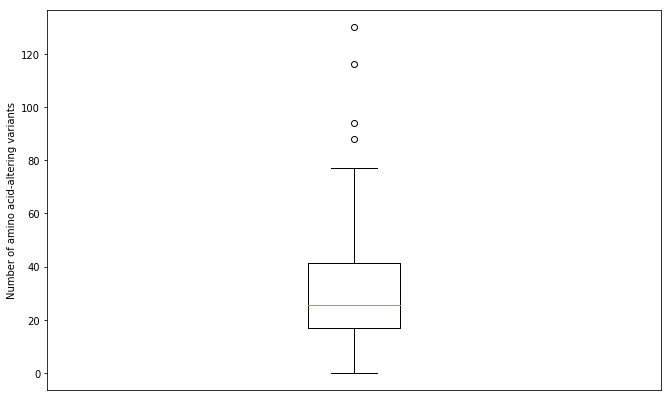

In [17]:
fig, ax = plt.subplots()
ax.boxplot(gt["aaAlteringVariantCount"])
ax.get_xaxis().set_visible(False)
ax.set(ylabel="Number of amino acid-altering variants")

In [18]:
fig.savefig(str(RESULTS / "gt_number_of_aa_altering_variants.png"))

Show the GTs with the most number of AA-altering variants.

In [19]:
cols = ["ensemblId", "geneSymbol", "uniprotId", "aaAlteringVariantCount", "orphanet"]
gt.nlargest(10, "aaAlteringVariantCount")[cols]

ensemblId geneSymbol uniprotId  aaAlteringVariantCount     orphanet
191  ENSG00000102699      PARP4    Q9UKK3                     130          NaN
238  ENSG00000102595      UGGT2    Q9NYU1                     116          NaN
37   ENSG00000139044   B4GALNT3    Q6L9W6                      94          NaN
107  ENSG00000162688        AGL    P35573                      88          366
241  ENSG00000103489      XYLT1    Q86Y38                      77  1425,370930
62   ENSG00000033100      CHPF2    Q9P2E5                      74          NaN
236  ENSG00000136731      UGGT1    Q9NYU2                      73          NaN
185  ENSG00000178685     PARP10    Q53GL7                      71          NaN
225  ENSG00000244474     UGT1A4    P22310                      67          NaN
233  ENSG00000213759    UGT2B11    O75310                      67          NaN

Surprisingly, within the GTs with the most number of AA-altering variants, there are two GTs with Orphanet entries.

_AGL_ (autosomal recessive):
    
    Glycogen debranching enzyme (GDE) deficiency, or glycogen storage disease type 3 (GSD 3), is a form of glycogen storage disease characterized by severe muscle weakness and hepatopathy.
    
_XYLT1_ (autosomal recessive):

    Desbuquois syndrome (DBQD) is an osteochondrodysplasia characterized by severe micromelic dwarfism, facial dysmorphism, joint laxity with multiple dislocations, vertebral and metaphyseal abnormalities and advanced carpotarsal ossification. Two forms have been distinguished on the basis of the presence (type 1) or the absence (type 2) of characteristic hand anomalies. A variant form of DBQD, Kim variant (see these terms), has also been described and is characterized by short stature and articular, minor facial and significant hand anomalies.
    
    Mutations in the gene XYLT1 (16p12) has been reported to cause DBQD type 2.
    
There is also an entry for XYLT1-CDG (Orpha 370930) without any further information.

Show the GTs with the least number of AA-altering variants.

In [20]:
gt.nsmallest(10, "aaAlteringVariantCount")[cols]

ensemblId geneSymbol uniprotId  aaAlteringVariantCount    orphanet
148  ENSG00000073849    ST6GAL1    P15907                       0         NaN
155  ENSG00000165704      HPRT1    P00492                       0   79233,510
163  ENSG00000182050     MGAT4C    Q9UBM8                       0         NaN
176  ENSG00000147162        OGT    O15294                       0         NaN
96   ENSG00000143641     GALNT2    Q10471                       1         NaN
26   ENSG00000162885   B3GALNT2    Q8NCR0                       2     588,899
138  ENSG00000126091    ST3GAL3    Q11203                       2  88616,3451
16   ENSG00000086848       ALG9    Q9H6U8                       6       79328
47   ENSG00000169255   B3GALNT1    O75752                       6         NaN
52   ENSG00000171155  C1GALT1C1    Q96EU7                       6         NaN

In [21]:
print(f"There are {len(gt[gt['aaAlteringVariantCount'] == 0])} GTs without any AA-altering variants at all.")

There are 4 GTs without any AA-altering variants at all.


Do these have Orphanet entries, indicating a need for preservation?

In [22]:
gt[gt["aaAlteringVariantCount"] == 0][["ensemblId", "geneSymbol", "proteinName", "chromosome", "orphanet"]]

ensemblId geneSymbol  \
148  ENSG00000073849    ST6GAL1   
155  ENSG00000165704      HPRT1   
163  ENSG00000182050     MGAT4C   
176  ENSG00000147162        OGT   

                                           proteinName chromosome   orphanet  
148     Beta-galactoside alpha-2,6-sialyltransferase 1          3        NaN  
155     Hypoxanthine-guanine phosphoribosyltransferase          X  79233,510  
163  Alpha-1,3-mannosyl-glycoprotein 4-beta-N-acety...         12        NaN  
176  UDP-N-acetylglucosamine--peptide N-acetylgluco...          X        NaN

_HPRT1_ deficiency causes Lesch Nyhan-syndrome (Orpha 510):

    Lesch-Nyhan syndrome (LNS) is the most severe form of hypoxanthine-guanine phosphoribosyltransferase (HPRT) deficiency (see this term), a hereditary disorder of purine metabolism, and is associated with uric acid overproduction (UAO), neurological troubles, and behavioral problems.
    
Indeed, variation in _HPRT1_ is rare with only a single loss of function variant in ExAC (http://exac.broadinstitute.org/gene/ENSG00000165704), rs137852491 (http://www.ncbi.nlm.nih.gov/projects/SNP/snp_ref.cgi?rs=rs137852491), carried by a single hemizygous individual and with a total allele count of 5. (http://exac.broadinstitute.org/variant/X-133607495-GGTAA-G).

Is this variant included in our data (is it in 1000 Genomes?)?

In [23]:
if len(variants[variants["id"] == "rs137852491"]):
    print("The variant rs137852491 is in the data.")
else:
    print("The variant rs137852491 is NOT in the data.")

The variant rs137852491 is NOT in the data.


It was not in our data.

### Consequences of variants 

In [24]:
def get_consequence_terms(df):
    l = []
    for terms in df["consequenceTerms"].str.split(","):
        l.extend(terms)
    return pd.Series(l)

In [25]:
consequence_terms = get_consequence_terms(variants).value_counts().to_frame()

In [26]:
len(variants)

550275

In [27]:
consequence_terms.columns = ["n"]
consequence_terms

n
intron_variant            455640
upstream_gene_variant      43719
downstream_gene_variant    23128
3_prime_UTR_variant        13580
missense_variant            7057
synonymous_variant          4239
5_prime_UTR_variant         2558
splice_region_variant        873
stop_gained                  208
splice_donor_variant          38
splice_acceptor_variant       34
frameshift_variant            30
inframe_deletion              13
start_lost                    13
stop_retained_variant          9
stop_lost                      6
inframe_insertion              4
coding_sequence_variant        1
protein_altering_variant       1

In [28]:
consequence_terms["proportion"] = consequence_terms["n"] / consequence_terms["n"].sum()

In [29]:
consequence_terms

n  proportion
intron_variant            455640    0.826706
upstream_gene_variant      43719    0.079323
downstream_gene_variant    23128    0.041963
3_prime_UTR_variant        13580    0.024639
missense_variant            7057    0.012804
synonymous_variant          4239    0.007691
5_prime_UTR_variant         2558    0.004641
splice_region_variant        873    0.001584
stop_gained                  208    0.000377
splice_donor_variant          38    0.000069
splice_acceptor_variant       34    0.000062
frameshift_variant            30    0.000054
inframe_deletion              13    0.000024
start_lost                    13    0.000024
stop_retained_variant          9    0.000016
stop_lost                      6    0.000011
inframe_insertion              4    0.000007
coding_sequence_variant        1    0.000002
protein_altering_variant       1    0.000002

In [30]:
consequence_terms["proportion"].cumsum()

intron_variant              0.826706
upstream_gene_variant       0.906029
downstream_gene_variant     0.947992
3_prime_UTR_variant         0.972632
missense_variant            0.985436
synonymous_variant          0.993127
5_prime_UTR_variant         0.997768
splice_region_variant       0.999352
stop_gained                 0.999730
splice_donor_variant        0.999799
splice_acceptor_variant     0.999860
frameshift_variant          0.999915
inframe_deletion            0.999938
start_lost                  0.999962
stop_retained_variant       0.999978
stop_lost                   0.999989
inframe_insertion           0.999996
coding_sequence_variant     0.999998
protein_altering_variant    1.000000
Name: proportion, dtype: float64

In [31]:
consequence_terms.to_csv(RESULTS / "variant_consequence_terms.txt", sep="\t", index=True)

In [32]:
fig, ax = plt.subplots()
consequence_terms.plot.bar(ax=ax)
ax.set(yscale="log", ylabel="$log_{10}$ Number of variants", xlabel="Consequence term")

[None,

In [33]:
fig.tight_layout()
fig.savefig(str(RESULTS / "variant_consequence_terms.png"))

### Impact of consequences

The Variant effects predictor measure is used.

In [34]:
variants["impact"].value_counts()

MODIFIER    538002
MODERATE      7075
LOW           4869
HIGH           329
Name: impact, dtype: int64

How are impact terms distributed among consequence terms categories?

In [35]:
impacts = pd.crosstab(variants["consequenceTerms"], variants["impact"], margins=True)
impacts

impact                                              HIGH   LOW  MODERATE  \
consequenceTerms                                                           
3_prime_UTR_variant                                    0     0         0   
5_prime_UTR_variant                                    0     0         0   
coding_sequence_variant                                0     0         0   
downstream_gene_variant                                0     0         0   
frameshift_variant                                    27     0         0   
frameshift_variant,splice_region_variant               1     0         0   
frameshift_variant,splice_region_variant,intron...     1     0         0   
frameshift_variant,stop_retained_variant               1     0         0   
inframe_deletion                                       0     0        13   
inframe_insertion                                      0     0         4   
intron_variant                                         0     0         0   
missense_variant                                       0     0      6904   
missense_variant,splice_region_variant                 0     0       153   
protein_altering_variant                               0     0         1   
splice_acceptor_variant                               34     0         0   
splice_donor_variant                                  38     0         0   
splice_region_variant,5_prime_UTR_variant              0    19         0   
splice_region_variant,intron_variant                   0   603         0   
splice_region_variant,synonymous_variant               0    93         0   
start_lost                                            12     0         0   
start_lost,5_prime_UTR_variant                         1     0         0   
stop_gained                                          205     0         0   
stop_gained,splice_region_variant                      3     0         0   
stop_lost                                              6     0         0   
stop_retained_variant                                  0     8         0   
synonymous_variant                                     0  4146         0   
upstream_gene_variant                                  0     0         0   
All                                                  329  4869      7075   

impact                                              MODIFIER     All  
consequenceTerms                                                      
3_prime_UTR_variant                                    13580   13580  
5_prime_UTR_variant                                     2538    2538  
coding_sequence_variant                                    1       1  
downstream_gene_variant                                23128   23128  
frameshift_variant                                         0      27  
frameshift_variant,splice_region_variant                   0       1  
frameshift_variant,splice_region_variant,intron...         0       1  
frameshift_variant,stop_retained_variant                   0       1  
inframe_deletion                                           0      13  
inframe_insertion                                          0       4  
intron_variant                                        455036  455036  
missense_variant                                           0    6904  
missense_variant,splice_region_variant                     0     153  
protein_altering_variant                                   0       1  
splice_acceptor_variant                                    0      34  
splice_donor_variant                                       0      38  
splice_region_variant,5_prime_UTR_variant                  0      19  
splice_region_variant,intron_variant                       0     603  
splice_region_variant,synonymous_variant                   0      93  
start_lost                                                 0      12  
start_lost,5_prime_UTR_variant                             0       1  
stop_gained                                                0     205  
stop_gained,spl

In [36]:
impacts.to_csv(RESULTS / "variant_impact_of_consequence_terms.txt", sep="\t")

More than 7000 variants are annotated to have "moderate" or higher impact, most of which are missense, stop gained or splice donor or acceptor variants.

Intron, up- and downstream variants are labelled "modifier", which can be true given the presence of variants in regulatory elements.

### Impact of amino acid-altering variants

In [37]:
def get_aa_alt_impact(df_var, normalize=False):
    aa_alt = df_var.query("impact == 'MODERATE' or impact == 'HIGH'")
    return pd.crosstab(aa_alt["impact"], aa_alt["isAminoAcidAltering"], margins=True, normalize=normalize)
aa_alt_impact = get_aa_alt_impact(variants)
aa_alt_impact

isAminoAcidAltering  False  True   All
impact                                
HIGH                    74   255   329
MODERATE                 0  7075  7075
All                     74  7330  7404

All amino-acid altering variants were annotated as having at least moderate impact. Frequencies:

In [38]:
get_aa_alt_impact(variants, normalize=True)

isAminoAcidAltering     False      True       All
impact                                           
HIGH                 0.009995  0.034441  0.044435
MODERATE             0.000000  0.955565  0.955565
All                  0.009995  0.990005  1.000000

Only 74 variants with high impact were not AA-altering, and no variants with moderate impact. The high impact, non-aa-altering variants, had these terms.

In [39]:
variants.query("impact == 'HIGH' and not isAminoAcidAltering")["consequenceTerms"].value_counts()

splice_donor_variant                        38
splice_acceptor_variant                     34
frameshift_variant,stop_retained_variant     1
start_lost,5_prime_UTR_variant               1
Name: consequenceTerms, dtype: int64

These were the splice donor/acceptor variants, a combined frameshift-stop retained variant, and a start lost-variant.

## Indel lengths

Some indels are in the data, how many?

In [40]:
variants["isIndel"] = variants["length"] > 1

In [41]:
variants["isIndel"].value_counts()

False    543040
True       7235
Name: isIndel, dtype: int64

In [42]:
print(f"There are {variants['isIndel'].sum():,} indels.")

There are 7,235 indels.


Distribution of lengths

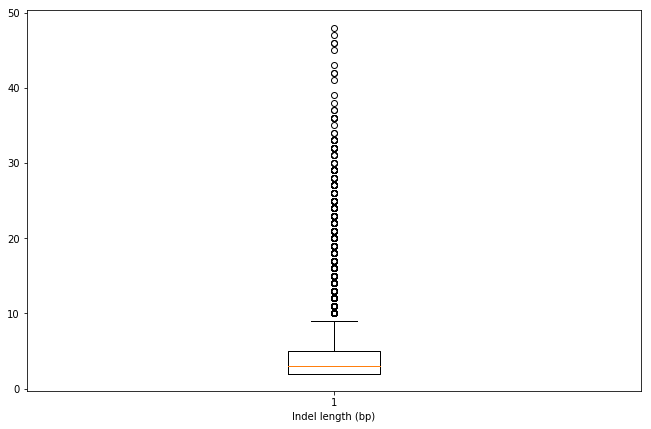

In [43]:
fig, ax = plt.subplots()
# variants[variants["isIndel"]]["length"].plot.hist(ax=ax)
indel_lengths = variants[variants["isIndel"]]["length"]
ax.boxplot(indel_lengths.values)
ax.set(xlabel="Indel length (bp)")

In [44]:
indel_lengths.describe()

count    7235.000000
mean        5.021700
std         4.992967
min         2.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        48.000000
Name: length, dtype: float64

Most indel are very short but there are indels up to 48 bp length.

## Re-write data to disk

In [45]:
gt.to_csv(gt_filename, sep="\t", index=False)

fname = str(RESULTS / "gt_variants.txt")
variants.to_csv(fname, sep="\t", index=False)
subprocess.run(["pigz", "-f", fname])

CompletedProcess(args=['pigz', '-f', '../results/gt_variants.txt'], returncode=0)